In [1]:
%load_ext autoreload

In [13]:
%autoreload 2
from soundcomp import Sound, Signal
import soundcomp as sc

In [5]:
import librosa
import librosa.display
from soundfile import write
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal as sig
from noisereduce import reduce_noise

# Structure du programme

## Une classe pour faire des opérations sur un signal audio : `class Signal(signal, sr)`

`Signal(signal, sr)`  : retourne une instance de la classe Signal à partir d'un vecteur d'échantillons audios `signal`et une fréquence d'échantillonage `sr`


### Des méthodes qui calculent des attributs d'un signal :
**Ces méthodes sont appellées à la création de l'instance du signal :**

`.time()` Crée l'attribut `.t` correspondant au vecteur de temps du signal, calculé d'après le nombre d'échantillons et la fréquence d'échantillonage

`.fft()` Crée l'attribut `.fft` correspondant à la norme réèlle de la partie symétrique de la transformée de fourier du signal

`.envelop()` Crée les attributs `.envelop()` et `.envelop_time` corresondant à l'envelopppe et au vecteur temps du signal.

### Des méthodes qui transforment le signal et retournent une version transformée

`.trim_onset(delay=100, inplace=False)` Retire la partie du signal jusqu'à un `delay` en milisecondes avant l'attaque du signal. Retourne la version tronquée du signal, l'argument `inplace` permet de modifier le signal lui-même sans retourner de résultat.

`.filter_noise()` Utilise le module `noisereduce` pour retirer le bruit ambiant du signal. Retourne une version filtrée du signal. Le bruit est obtenu de la partie retirée par la fonction `.trim_onset`. 

`.normalize()` Retourne une version normalisée du signal avec des valeurs comprises entre $[-1, 1]$

`.make_freq_bins(bins=None)` Sépare le signal en bins de fréquences avec des filtres butterworth passe-bande et retourne un `dict` avec comme clés le nom des bins et comme valeurs les signaux de chaque bin. Les valeurs par défault des bins sont : 
- bass < 70 Hz
- mid = 500
- highmid = 2000 Hz
- uppermid = 4000 Hz
- presence > 6000 Hz

### Des méthodes permettant à l'utilisateur d'interagir avec le signal

`.listen()` Permet d'écouter le signal dans un Jupyter Notebook

`.plot(kind, fft_range=2000, **kwargs)` Une méthode générale pour faire le tracé des différents attributs d'un signal.  Les `kind` supportés sont : 
- `signal` : tracé du signal selon le temps 
- `envelop` : tracé de l'enveloppe du signal selon le temps
- `fft` : tracé de la transformée de fourrier du signal selon la fréquence
- `spectrogram` : tracé du spectrogramme du signal

`make_soundfile(name, path='')` Enregistre le signal en format `.wav` sous le nom `name` au chemin `path`, le chemin par défault est le répertoire courant du Jupyter Notebook





## Une classe pour stocker les signaux audios et les comparer : `class Sound(object)`

### Création d'une instance de la classe Sound à partir d'un fichier audio 

`Sound(file)` retourne une instance de la classe Sound crée à partir d'un fichier audio correspondant à la variable `file`

Des attributs contenant divers signaux sont crées à l'initialisation d'une instance de la classe `Sound`: 

`Sound.raw_signal` : le signal brut correspondant au fichier audio à partir duquel l'instance de la classe `Sound`a été crée

`Sound.trimmed_signal` : Le signal tronqué juste avant l'attaque par la méthode `.trim_onset()` de la classe `Signal`

`Sound.signal` : Le signal tronqué filtré par la méthode `.filter_noise()` de la classe `Signal`

`Sound.bins` : Un `dict` avec comme valeurs les signaux obtenus par la méthode `.make_freq_bins` de la classe `Signal`, les clées du `dict` sont le nom des bins de fréquence ('bass', 'mid', 'highmid' 'uppermid', 'presence', 'brillance')

Les signaux correspondant aux bins de fréquence peuvent aussi être accédé par des attributs leur correspondant dans la classe `Sound`, Ex:

`Bass_Signal = Sound.bass`

### Méthodes permettant la vérification des transformations effectuées sur les signaux audios

Afin de vérifier que les méthodes de la classe `Signal` permettant de transformer les signaux audios et en retourner une version modifiée ont bien fonctionné (`.trim_onset()`, `.filter_noise`), des méthodes existent dans la classe `Sound` : 

`.validate_trim()` Valide que la troncature du signal avant l'attaque a été faite au bon endroit en traçant l'envelope du signal non tronqué (`Sound.raw_signal`) et du signal tronqué avec un point correspondant au pic de l'attaque (`Sound.trimmed_signal`)

`.validate_noise()` Valide que la transformation retirant le bruit du signal ne l'a pas déterioré en permettant à l'utilisateur d'écouter les deux signaux (`Sound.trimmed_signal()` et `Sound.signal`)

### Méthodes permettant à l'utilisateur d'interagir avec l'instance de la classe `Sound`

`.listen_freq_bins()` Permet d'écouter les signaux correspondant à chaque bin de fréquence obtenue par la séparation du signal

`.plot_freq_bins()` Permet de tracer l'enveloppe de toutes les bins de fréquence d'une instance de la classe `Sound`

## Fonctions globales permettant de comparer des sons entre eux

`time_compare(sounds, fbin='all')` Permet de comparer $n$ sons dans le domaine temporel en traçant l'enveloppe des bins de fréquence. l'argument `fbin` permet de spécifier quels bins on veut tracer, les valeurs supportées sont :
- `'all'` La valeur par défault, trace un graphique pour chaque bin
- Une des valeurs suivantes : `'bass'`, `'mid'`, `'highmid'`, `'uppermid'`, `'presence'`, `'brillance'`

`fft_compare()` Compare les fft de $n$ sons **(TODO)**

`fft_diff` Calcule la différence entre deux spectrogrames de façon intelligente **(TODO)**


# TODO

- [ ] Présenter deux sons à partir d'une base de donnée et demander lequel est le préféré (Préférence sur la longueur de l'attaque)
- [ ] `fft_compare` Comparer les fft de $n$ sons ()
- [ ] `fft_diff` Calcule la différence entre deux spectrogrames de façon intelligente
- [ ] Enveloppe progressive pour avoir un graphique smooth avec l'axe des x en log



In [6]:
file1 = "soundfiles/Carbon_D0_2.wav"
file2 = "soundfiles/Wood_D0_2.wav"
sound1 = Sound(file1) 
sound2 = Sound(file2)

 ## Validation des transformation du signal

In [7]:
sound1.validate_noise()

not filtered


filtered


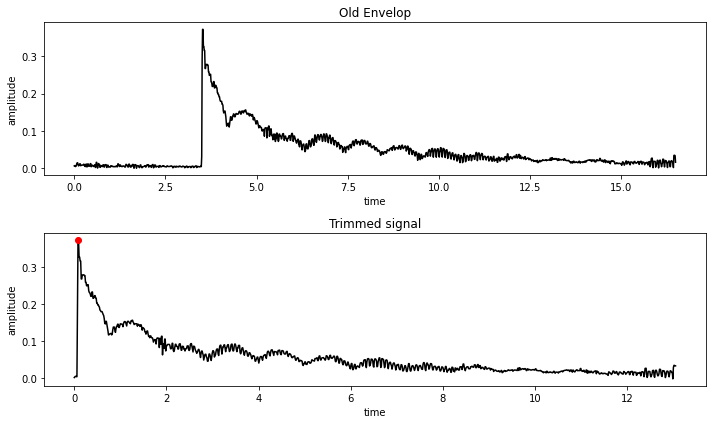

In [8]:
sound1.validate_trim()

## Graphique des enveloppes pour toutes les bins de fréquence

In [9]:
sound1.plot_freq_bins()

## Écoute de chaque bin de fréquence

In [10]:
sound2.listen_freq_bins()

bass


mid


highmid


uppermid


presence


brillance


## Comparaison temporelle des deux sons

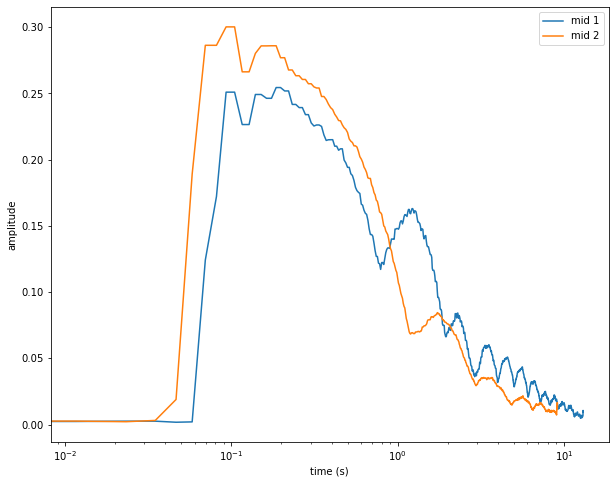

In [11]:
sc.time_compare(sound1, sound2, fbin='mid')

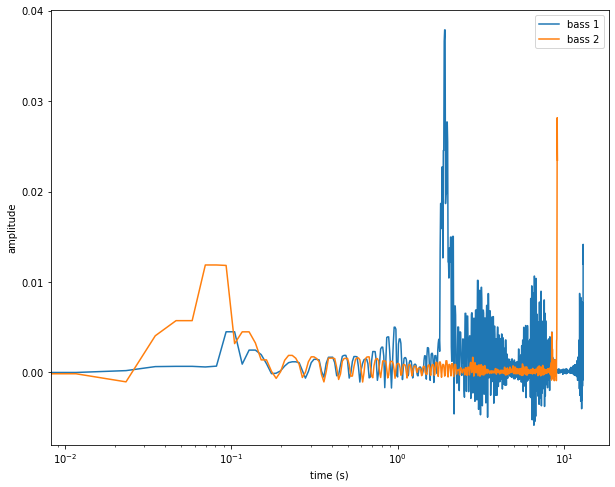

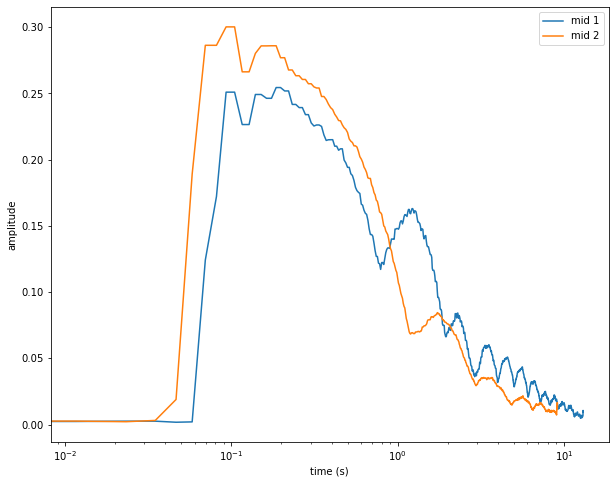

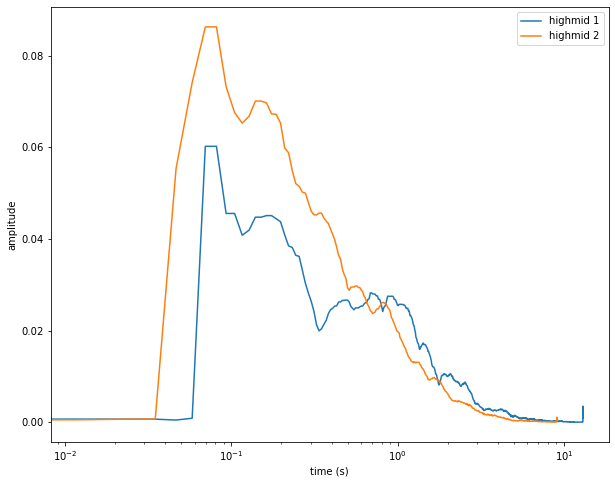

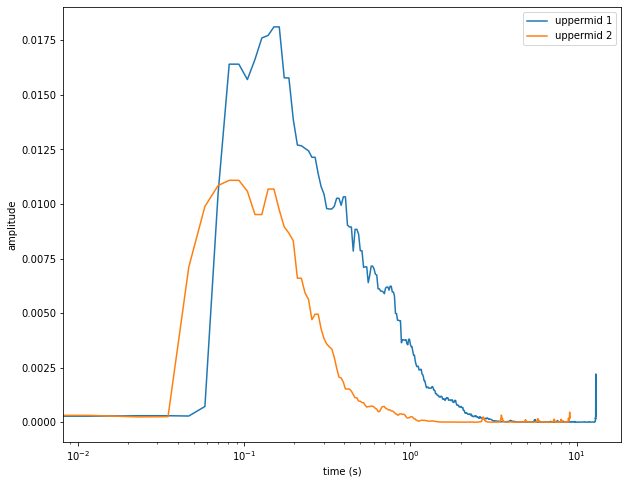

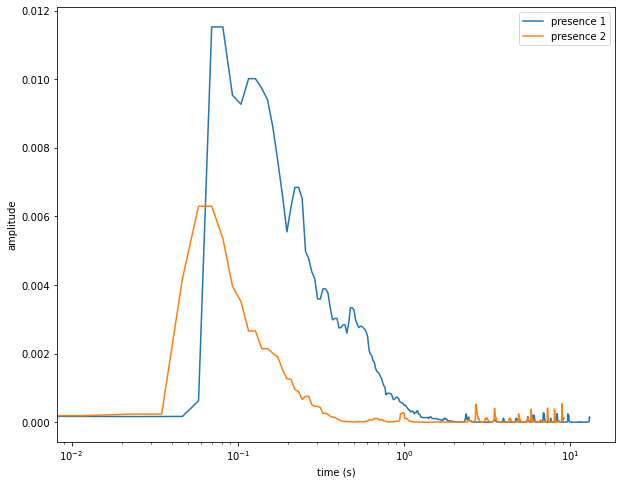

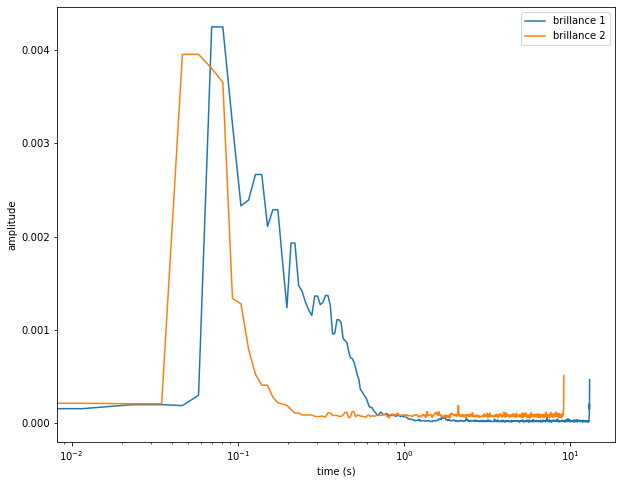

In [12]:
sc.time_compare(sound1, sound2, fbin = 'all')